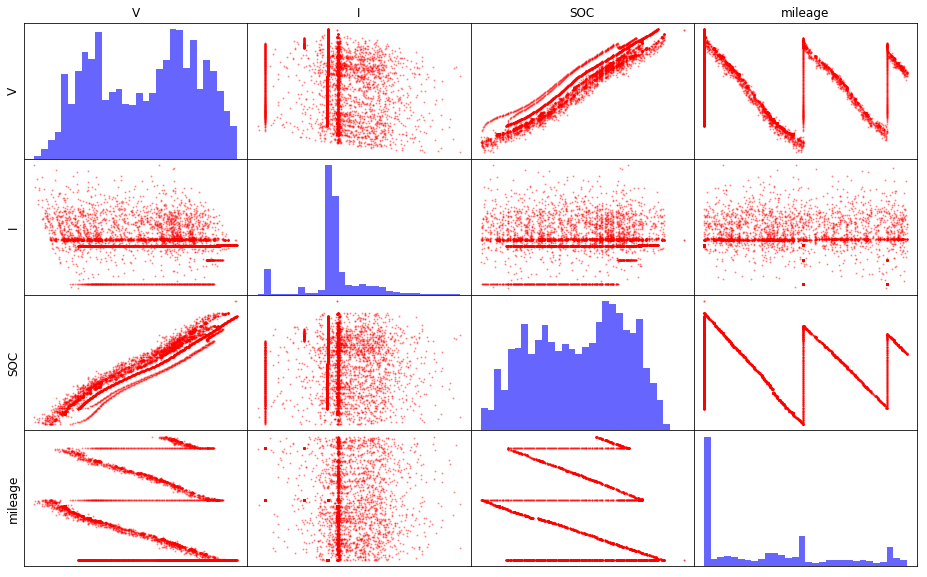

In [2]:
# -*- coding: utf-8 -*-
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os,xlrd

def readata(path,sheet,col,chop,str=0):   
    dt=[]
    data=xlrd.open_workbook(path)
    table=data.sheet_by_index(sheet)
    value=table.col_values(col)
    value.pop(0)
    for val in value:
        if str == 1:
            dt.append(val)
        elif chop==0:
            dt.append(float(val.encode('utf-8')))
        else:
            dt.append(float(val[:-chop].encode('utf-8')))
    return dt


def badpop(lt):              #去坏值
    i=0
    p=[]
    pop=[]
    mean=np.mean(lt)
    std=np.std(lt)
    for x in lt:
        if abs(mean-x)>std*10:
            p.append(i)
        i+=1
    for i in range(len(p)):
        pop.append(p[i]-i)
    return pop

def zeropop(lt):              #去零值
    i=0
    p=[]
    pop=[]
    for x in lt:
        if x==0:
            p.append(i)
        i+=1
    for i in range(len(p)):
        pop.append(p[i]-i)
    return pop


def correlation_analysis(datalist,labels):                              
    n=len(labels)
    fig,axes=plt.subplots(n,n,sharex=False,sharey=False)
    fig.set_size_inches(16,10)
    plt.subplots_adjust(wspace=0,hspace=0)
    for i in range(n):
        for j in range(n):
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])
            if i==0:
                axes[i,j].set_title(labels[j],fontsize='large')
            if j==0:
                axes[i,j].set_ylabel(labels[i],fontsize='large')
            if i==j:
                axes[i,i].hist(datalist[i],30,color='b',alpha=0.6)
            else:
                axes[i,j].scatter(datalist[j],datalist[i],marker='.',s=5,color='r',alpha=0.3)


path=u'data/vehicle-京B7Y242-20150416133936.xls'
Vdata=readata(path,0,9,1)
Idata=readata(path,0,17,1)
SOC=readata(path,0,16,1)
mileage=readata(path,1,4,2)

datalist=[Vdata,Idata,SOC,mileage]
labels=['V','I','SOC','mileage']

for i in range(4):               #去坏值
    bad=badpop(datalist[i])
    for j in range(len(bad)):
        datalist[0].pop(bad[j]) 
        datalist[1].pop(bad[j]) 
        datalist[2].pop(bad[j]) 
        datalist[3].pop(bad[j]) 

correlation_analysis(datalist,labels)
